In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import keras
from sklearn.metrics import classification_report, confusion_matrix
from contextlib import redirect_stdout

In [27]:
dataset = tf.keras.datasets.fashion_mnist.load_data()

(X_train, y_train), (X_test, y_test) = dataset

In [28]:
y_train_onehot = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_onehot = tf.keras.utils.to_categorical(y_test, num_classes=10)

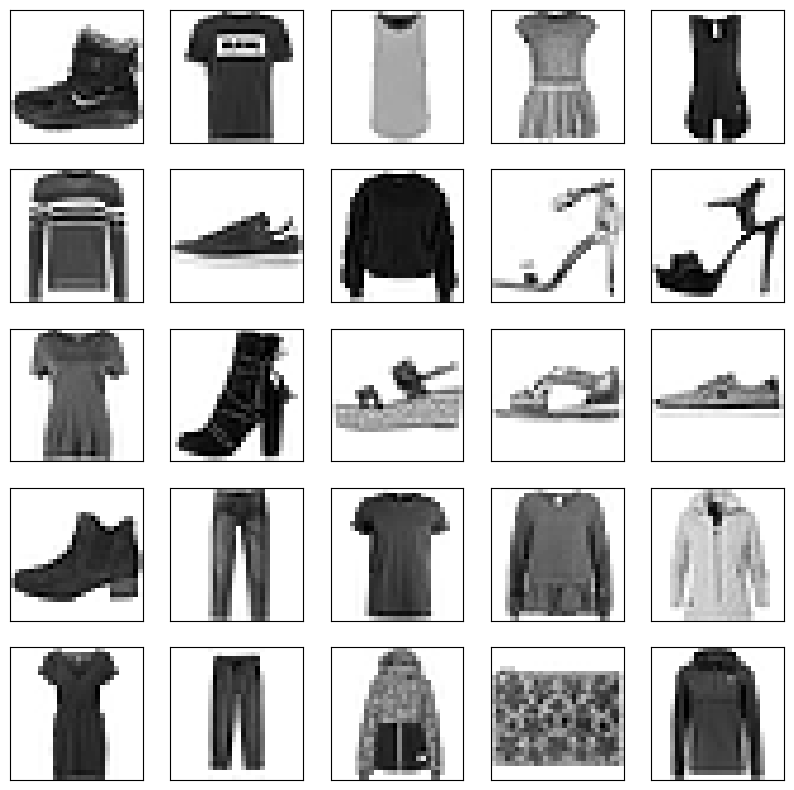

In [29]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap=plt.cm.binary)
plt.show()

In [30]:
X_train = X_train/255
X_test = X_test/255

In [31]:
early_stopping = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
checkpoints = keras.callbacks.ModelCheckpoint("best_model.keras", save_best_only=True)

In [32]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
    ])

In [33]:
model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])
model.fit(X_train, y_train_onehot, epochs=100,batch_size = 100, validation_split=0.1, callbacks=[early_stopping, checkpoints])

Epoch 1/100
540/540 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7588 - loss: 0.6907 - val_accuracy: 0.8577 - val_loss: 0.3864
Epoch 2/100
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8605 - loss: 0.3825 - val_accuracy: 0.8698 - val_loss: 0.3554
Epoch 3/100
540/540 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8778 - loss: 0.3288 - val_accuracy: 0.8630 - val_loss: 0.3710
Epoch 4/100
540/540 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8892 - loss: 0.3029 - val_accuracy: 0.8760 - val_loss: 0.3461
Epoch 5/100
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8955 - loss: 0.2857 - val_accuracy: 0.8835 - val_loss: 0.3204
Epoch 6/100
540/540 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8976 - loss: 0.2733 - val_accuracy: 0.8692 - val_loss: 0.3645
Epoch 7/100
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9023 - loss: 0.2560 - val_accuracy: 0.8818 - val_loss: 0.3259
Epoch 8/100
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9098 - loss: 0.2444 - val_ac

In [36]:
with open('model_summary.txt', 'w') as f:
    with redirect_stdout(f):
        model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 799,832 (3.05 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 533,222 (2.03 MB)

In [38]:
model.evaluate(X_test, y_test_onehot)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8875 - loss: 0.3217


[0.3213988244533539, 0.8876000046730042]

In [39]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [40]:
y_predicted = np.argmax(y_pred, axis=1)

In [41]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.79      0.89      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.77      0.83      0.80      1000
           3       0.88      0.90      0.89      1000
           4       0.82      0.79      0.81      1000
           5       0.97      0.97      0.97      1000
           6       0.76      0.65      0.70      1000
           7       0.93      0.97      0.95      1000
           8       0.98      0.97      0.98      1000
           9       0.98      0.94      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



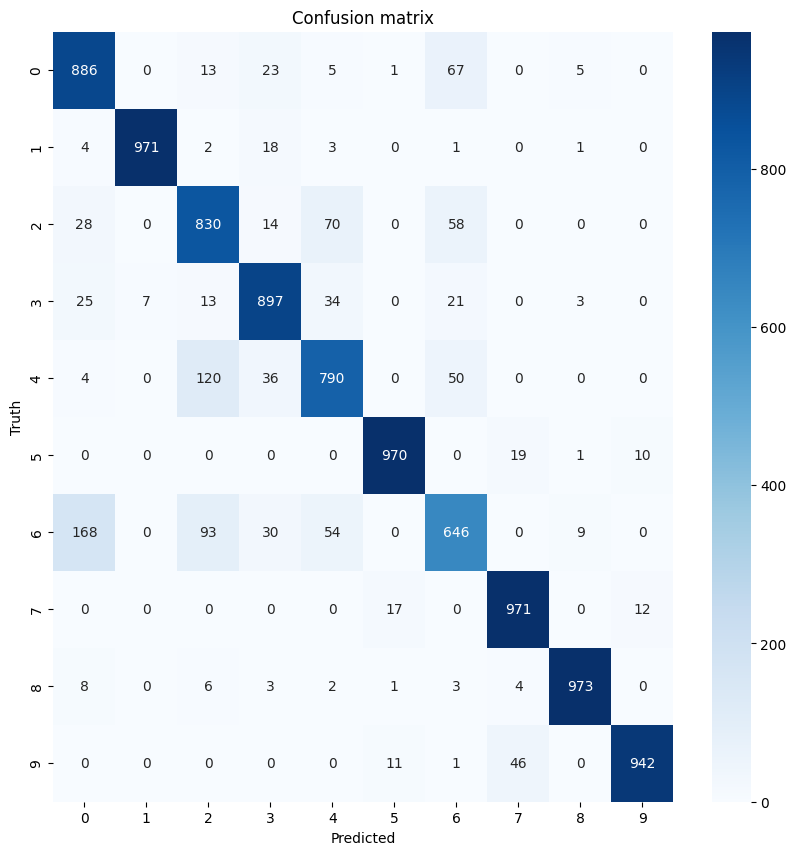

In [43]:
cm = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d',cmap="Blues")
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()